# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

In [7]:
import pandas_to_latex

In [8]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

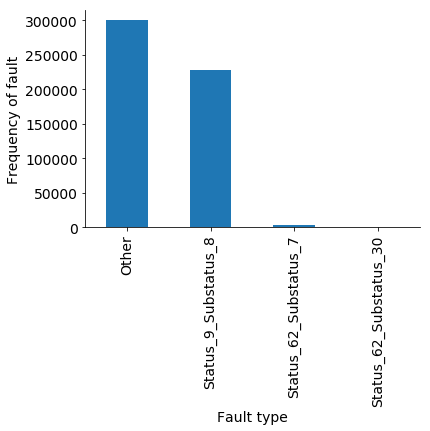

<Figure size 1440x1152 with 0 Axes>

In [9]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [10]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [11]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

In [12]:
print(undersampled_data['Status'].value_counts())

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64


# REMOVE THE CELL UNDER; THIS IS JUST FOR TESTING

In [14]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")

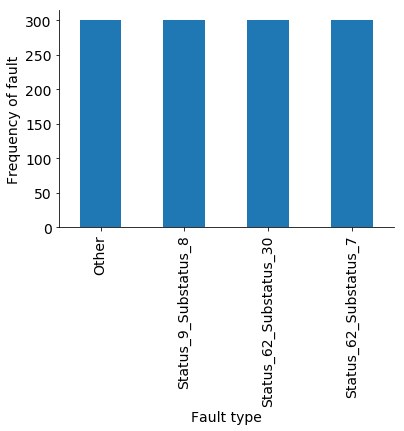

<Figure size 1440x1152 with 0 Axes>

In [15]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [16]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,27-09-2019 23:53:00,15.400001,13.700000,3.790000,109.0,0.0,33.0,50.0,33.0,24.0,...,43.0,22.0,29.0,17.0,34.0,38.0,78.0,13.060000,124.400002,Status_62_Substatus_7
1,20-09-2019 14:12:00,3.700000,20.100000,21.330000,233.0,2261.0,27.0,45.0,32.0,22.0,...,54.0,21.0,33.0,11.0,32.0,36.0,76.0,16.500000,236.699997,Status_62_Substatus_7
2,01-06-2018 23:48:00,-8.700000,4.100000,0.820000,31.0,0.0,17.0,20.0,18.0,20.0,...,16.0,25.0,14.0,10.0,17.0,21.0,32.0,60.070000,22.299999,Status_9_Substatus_8
3,28-03-2019 09:45:30,0.700000,20.700001,11.889999,220.0,0.0,8.0,24.0,14.0,19.0,...,65.0,26.0,48.0,7.0,11.0,16.0,27.0,35.470001,220.699997,Status_9_Substatus_8
4,25-03-2018 04:48:00,-1.500000,4.900000,11.139999,347.0,185.0,32.0,49.0,22.0,8.0,...,26.0,13.0,21.0,8.0,29.0,32.0,80.0,1.000000,345.500000,Status_62_Substatus_7


In [17]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(1200,)

In [18]:
y.value_counts()

Other                     300
Status_9_Substatus_8      300
Status_62_Substatus_30    300
Status_62_Substatus_7     300
Name: Status, dtype: int64

## SMOTE (BEFORE RANDOM FOREST)

In [19]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_smote ,y_smote = sm.fit_resample(X, y)

'''
X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)
'''

'\nX_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)\n'

## Random forest and feature importance

In [20]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=10, random_state=12)

df_rf, y_true, y_pred = performance_measure.cross_validate_model(rf,X,y)
performance_measure.confusion_matrix(y_true,y_pred)

# rf = random_forest_method.get_rf_model(pd.DataFrame(X_train_smote1,columns=X_train.columns), pd.DataFrame(X_test_smote1,columns=X_train.columns), y_train_smote1, y_test_smote1)
# rf1 = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

# Combine training and test data for cross validation:

rf.fit(X_smote,y_smote)

columns = X.columns
feature_importances = random_forest_method.get_feature_importances(rf, columns)
feature_importances.head()

The avg accc is:  0.8625

\begin{tabular}{lll}
\toprule
precision &  recall &    f1\_avg \\
\midrule
 0.867915 &  0.8625 &  0.861981 \\
\bottomrule
\end{tabular}



,importance
Log-T-Raw-Rectifier1HeatSink,0.088077
Log-T-Raw-Stator1Temperature,0.066003
Log-T-Raw-Rotor1Temperature,0.064277
Log-T-Raw-Rotor2Temperature,0.063195
Log-T-Raw-TransformerTemperature,0.062336


In [21]:
pandas_to_latex.df_to_latex(feature_importances.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.088077 \\
   0.066003 \\
   0.064277 \\
   0.063195 \\
   0.062336 \\
\bottomrule
\end{tabular}



## SVM

### Split data for LIME

In [22]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)
columns_for_data = X_train.columns
y_train.value_counts()
y_test.value_counts()

Status_62_Substatus_7     99
Other                     99
Status_9_Substatus_8      99
Status_62_Substatus_30    99
Name: Status, dtype: int64

### Scale data set for SVM

In [23]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

# Scale the whole dataset first
scaler_whole  = MinMaxScaler()
X_scaled = scaler_whole.fit_transform(X)

# Scale the SMOTE data set:
scaler_whole_smote  = MinMaxScaler()
X_scaled_oversampled = scaler_whole.fit_transform(X_scaled)

# Scale the train and test, for use with LIME

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()

(804, 34)
(396, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.571061,0.613772,0.942718,0.617318,0.978634,0.239130,0.389831,0.416667,0.425,0.512821,...,0.802632,0.789474,0.456522,0.311111,0.333333,0.513514,0.212766,0.222222,0.153204,0.631418
1,0.604016,0.302395,0.864565,0.494413,0.584416,0.500000,0.627119,0.583333,0.400,0.435897,...,0.815789,0.565789,0.521739,0.500000,0.282051,0.594595,0.446809,0.617284,0.000000,0.535377
2,0.554068,0.221557,0.635435,0.740223,0.178048,0.391304,0.525424,0.541667,0.400,0.435897,...,0.644737,0.526316,0.521739,0.422222,0.256410,0.486486,0.234043,0.222222,0.000000,0.735377
3,0.661174,0.389222,0.176732,0.301676,0.000000,0.717391,0.830508,0.666667,0.600,0.666667,...,0.394737,0.434211,0.434783,0.288889,0.641026,0.797297,0.723404,0.777778,0.381580,0.387484
4,0.742533,0.020958,0.003552,0.296089,0.000000,0.630435,0.525424,0.604167,0.825,0.846154,...,0.368421,0.368421,0.760870,0.255556,0.769231,0.689189,0.574468,0.395062,0.648972,0.422733


In [24]:
# Printing the 5 first columns and 5 first rows for the thesis
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

# The scaled set looks like this
pandas_to_latex.df_to_latex(head_row_col(X_train_scaled_df))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.613772 &    0.942718 &          0.617318 &     0.978634 &             0.239130 &  ... \\
  0.302395 &    0.864565 &          0.494413 &     0.584416 &             0.500000 &  ... \\
  0.221557 &    0.635435 &          0.740223 &     0.178048 &             0.391304 &  ... \\
  0.389222 &    0.176732 &          0.301676 &     0.000000 &             0.717391 &  ... \\
  0.020958 &    0.003552 &          0.296089 &     0.000000 &             0.630435 &  ... \\
\bottomrule
\end{tabular}



## SMOTE for training and test data

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote, y_test_smote = sm.fit_resample(X_test_scaled, y_test)

## SVM method

In [26]:
from sklearn.svm import SVC

### BALANCED SVM

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The avg accc is:  0.4666666666666666

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
 0.491328 &  0.466667 &  0.407528 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.05       0.27333333 0.12666667 0.55      ]
 [0.01       0.25333333 0.12666667 0.61      ]
 [0.02333333 0.07       0.73       0.17666667]
 [0.01666667 0.12333333 0.02666667 0.83333333]]


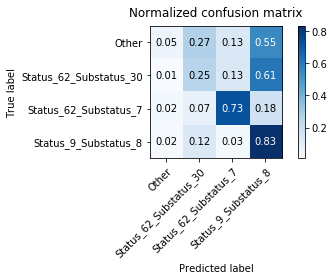

In [33]:
# Balanced
svm_balanced = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')
df_svm_balanced, y_true_svm_balanced, y_pred_svm_balanced = performance_measure.cross_validate_model(svm_balanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_balanced,y_pred_svm_balanced,normalize=True)

# svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

In [34]:
# Unbalanced
svm_unbalanced = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced, y_true_svm_unbalanced, y_pred_svm_unbalanced = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced,y_pred_svm_unbalanced,,normalize=True)

# svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

SyntaxError: invalid syntax (<ipython-input-34-fdc5c56ab50d>, line 4)

### UNBALANCED AND SMOTE SVM (USE THIS RESULT Best results for 62_30)!

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The avg accc is:  0.4666666666666666

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
 0.491328 &  0.466667 &  0.407528 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.05       0.27333333 0.12666667 0.55      ]
 [0.01       0.25333333 0.12666667 0.61      ]
 [0.02333333 0.07       0.73       0.17666667]
 [0.01666667 0.12333333 0.02666667 0.83333333]]


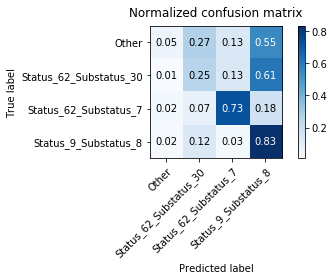

In [35]:
svm_unbalanced_smote = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced_smote, y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote = performance_measure.cross_validate_model(svm_unbalanced_smote,X_scaled_oversampled,y)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced_smote,y_pred_svm_unbalanced_smote,normalize=True)

# svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [36]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(X_test_scaled_smote.shape)
print(y_test.shape)

(804, 34)
(804,)
(396, 34)
(396,)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The avg accc is:  0.4666666666666666

\begin{tabular}{lll}
\toprule
precision &    recall &    f1\_avg \\
\midrule
 0.491328 &  0.466667 &  0.407528 \\
\bottomrule
\end{tabular}

Normalized confusion matrix
[[0.05       0.27333333 0.12666667 0.55      ]
 [0.01       0.25333333 0.12666667 0.61      ]
 [0.02333333 0.07       0.73       0.17666667]
 [0.01666667 0.12333333 0.02666667 0.83333333]]


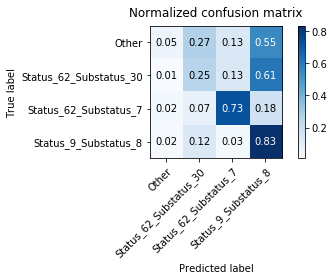

In [37]:
svm_balanced_smote = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')

df_svm_balanced_smote, y_true_svm_balanced_smote, y_pred_svm_balanced_smote = performance_measure.cross_validate_model(svm_balanced_smote,X_scaled_oversampled,y)
performance_measure.plot_confusion_matrix(y_true_svm_balanced_smote,y_pred_svm_balanced_smote,normalize=True)

# balanced with smote and undersampling
# svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## Decision tree model

### Remove the features from the random forest model called rf


In [ ]:
# rf_df = pd.DataFrame(feature_importances)
rf_df = feature_importances

rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

# Print to latex
pandas_to_latexdf_to_latex(df_selected_features)

In [ ]:
# Make the feature names more readable by removing "LOG-" etc.
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

In [ ]:
import numpy as np

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled_smote))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled_smote))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()

In [ ]:
col_rename_dict = {i:j for i,j in zip(X_test_scaled_removed.columns,shorter_feature_names)}
X_test_scaled_removed.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_test_scaled_removed.head()

In [ ]:
# Train DT on these features and print it out:
dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

In [ ]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_test_scaled_removed.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))

In [ ]:
save_tree(dt_depth2,"depth2")
save_tree(dt_depth3,"depth3")